In [1]:
import ccxt
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
exchange = ccxt.gateio()
symbol = 'SUPER/USDT' # Trading pair for SuperVerse
timeframe = '1h' # Time interval for each data point

# Fetch historical OHLCV data
ohlcv_data = exchange.fetch_ohlcv(symbol, timeframe=timeframe, limit=1000)

In [4]:
# Create a DataFrame with appropriate column names
data = pd.DataFrame(ohlcv_data, columns=['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume'])

# Convert timestamp to datetime
data['Date'] = pd.to_datetime(data['Timestamp'], unit='ms')
data.set_index('Date', inplace=True)

# Drop the original timestamp column
data.drop('Timestamp', axis=1, inplace=True)

In [5]:
# Calculate moving average and standard deviation of volume
data['Volume_MA'] = data['Volume'].rolling(window=24).mean()  # 24 periods for a 24-hour window
data['Volume_STD'] = data['Volume'].rolling(window=24).std()

# Define a volume spike threshold (e.g., volumes exceeding the mean by 2 standard deviations)
data['Volume_Spike'] = data['Volume'] > (data['Volume_MA'] + 2 * data['Volume_STD'])

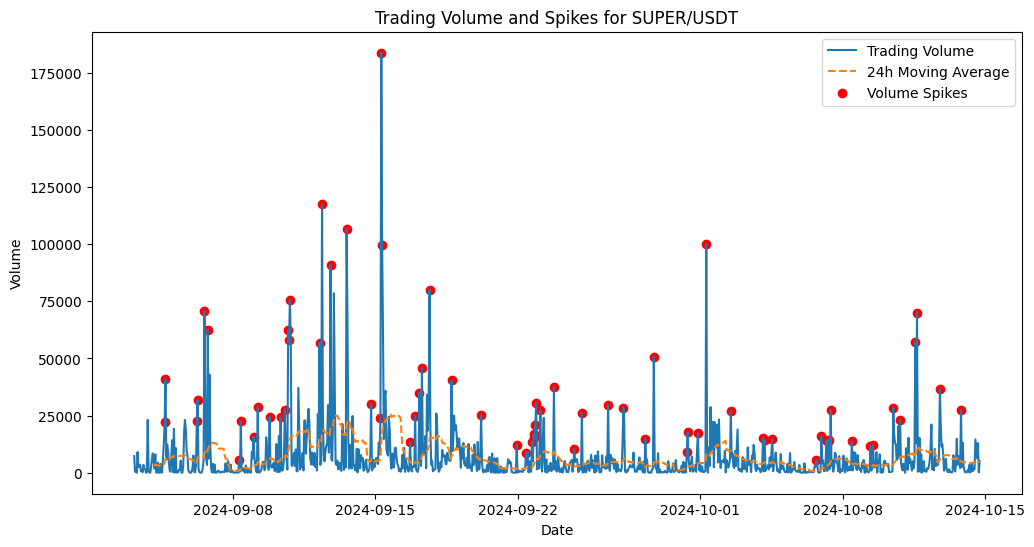

In [6]:
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Volume'], label='Trading Volume')
plt.plot(data.index, data['Volume_MA'], label='24h Moving Average', linestyle='--')

# Highlight volume spikes
spike_dates = data.index[data['Volume_Spike']]
spike_volumes = data['Volume'][data['Volume_Spike']]
plt.scatter(spike_dates, spike_volumes, color='red', label='Volume Spikes')

plt.title(f'Trading Volume and Spikes for {symbol}')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

In [7]:
# Get the timestamps of volume spikes
volume_spikes = data[data['Volume_Spike']]

print("Volume Spikes:")
print(volume_spikes[['Open', 'High', 'Low', 'Close', 'Volume']])

Volume Spikes:
                       Open    High     Low   Close    Volume
Date                                                         
2024-09-04 15:00:00  0.6469  0.6656  0.6378  0.6631  22271.19
2024-09-04 16:00:00  0.6664  0.6956  0.6574  0.6574  40798.92
2024-09-06 05:00:00  0.6245  0.6303  0.6245  0.6278  22834.00
2024-09-06 06:00:00  0.6274  0.6333  0.6253  0.6253  31816.89
2024-09-06 14:00:00  0.6210  0.6259  0.6121  0.6259  70863.59
...                     ...     ...     ...     ...       ...
2024-10-10 20:00:00  1.0758  1.0997  1.0710  1.0953  23042.45
2024-10-11 14:00:00  1.1817  1.1817  1.1531  1.1567  57008.04
2024-10-11 16:00:00  1.1635  1.1635  1.1537  1.1537  70046.11
2024-10-12 19:00:00  1.2485  1.2706  1.2363  1.2626  36578.03
2024-10-13 20:00:00  1.2303  1.2682  1.2295  1.2382  27430.00

[69 rows x 5 columns]


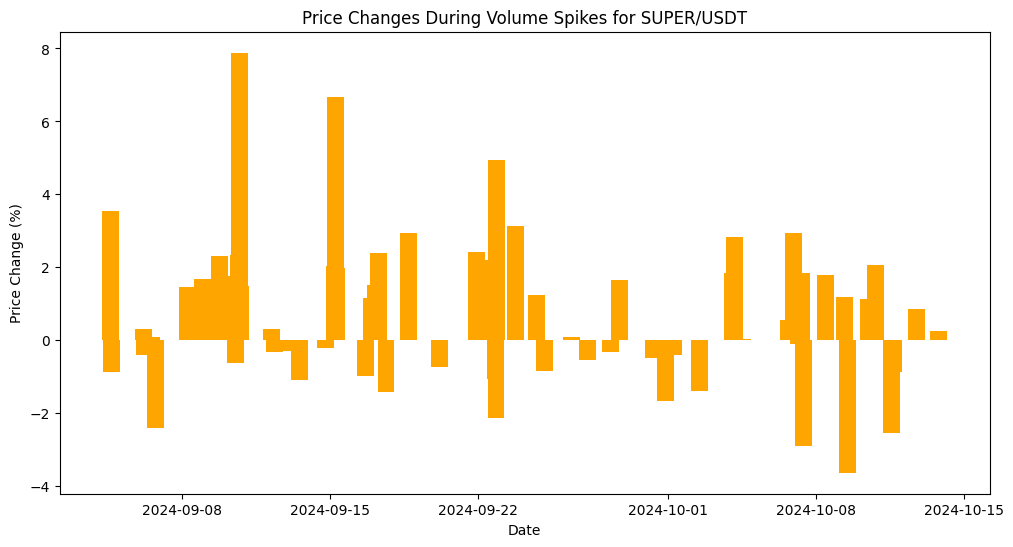

In [8]:
# Calculate price change percentages
data['Price_Change_%'] = data['Close'].pct_change() * 100

# Filter data for volume spikes
spike_data = data[data['Volume_Spike']]

# Plot price changes during volume spikes
plt.figure(figsize=(12, 6))
plt.bar(spike_data.index, spike_data['Price_Change_%'], color='orange')
plt.title(f'Price Changes During Volume Spikes for {symbol}')
plt.xlabel('Date')
plt.ylabel('Price Change (%)')
plt.show()